In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# reading dataset
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
# columns in dataset
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
# renaming column names
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [5]:
df.shape

(1156, 7)

In [6]:
# checking null values in dataset
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
# find duplicate rows
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [8]:
# there is one duplicated row, we are gonna remove this duplicate row
df.drop_duplicates(inplace = True)

In [9]:
# there we have 4 rows having starting and end-time exactly equal i.e. zero trip time, while having non-zero miles (distance) - which cannot be possible
df.drop(df.index[[751, 761, 798, 807]], inplace = True)

In [10]:
# converting START_DATE and END_DATE into date time

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [11]:
# add a duration (in minutes) column
df['DURATION'] = df['END_DATE'] - df['START_DATE']
df['DURATION'] = df['DURATION'].dt.total_seconds() / 60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1151 non-null   float64       
 6   PURPOSE     652 non-null    object        
 7   DURATION    1150 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 80.9+ KB


In [13]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


Text(0.5, 1.0, 'Cab Type')

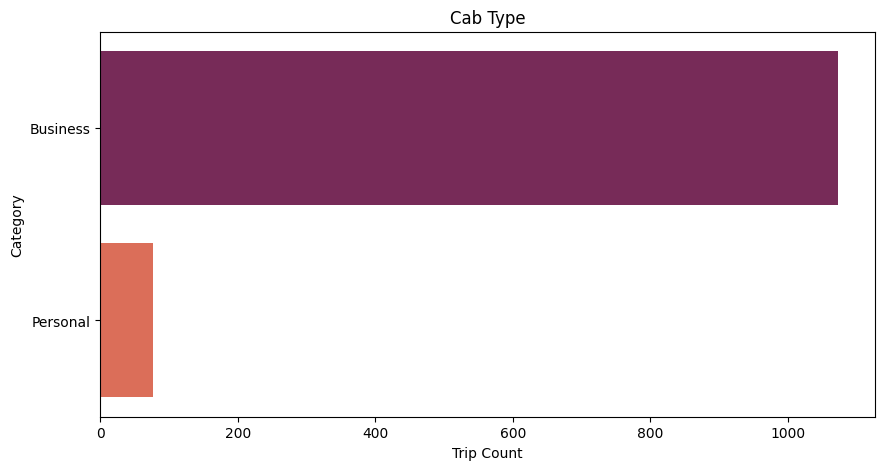

In [14]:
# count plot for trip category
plt.figure(figsize = (10, 5))
sns.countplot(df['CATEGORY'], palette = 'rocket')
plt.ylabel('Category')
plt.xlabel('Trip Count')
plt.title('Cab Type')

Text(0.5, 1.0, 'Popular Start Points')

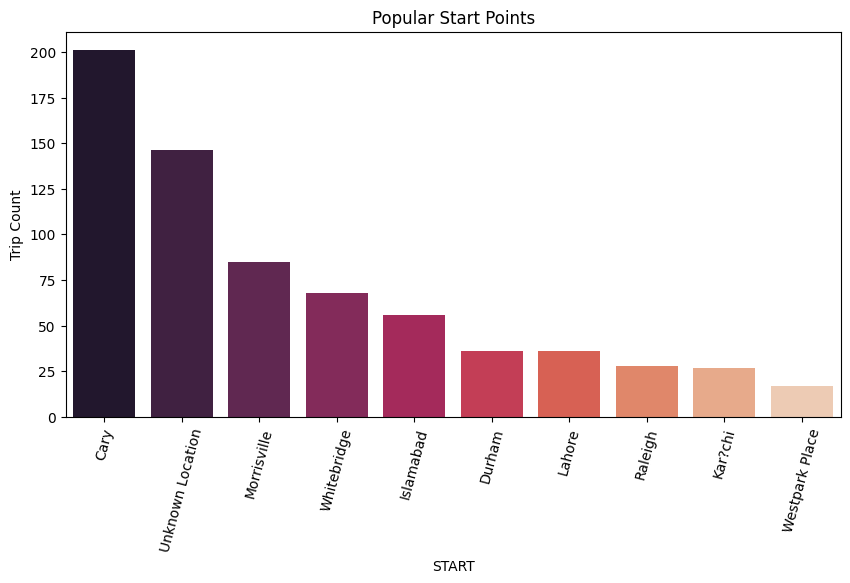

In [15]:
# bar plot for top 10 starting points
start_labels = df.START.value_counts().nlargest(10)

# bar plot
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 75)
sns.barplot(x = start_labels.index, y = start_labels, palette = 'rocket')
plt.ylabel('Trip Count')
plt.title('Popular Start Points')

Text(0.5, 1.0, 'Popular Stop Points')

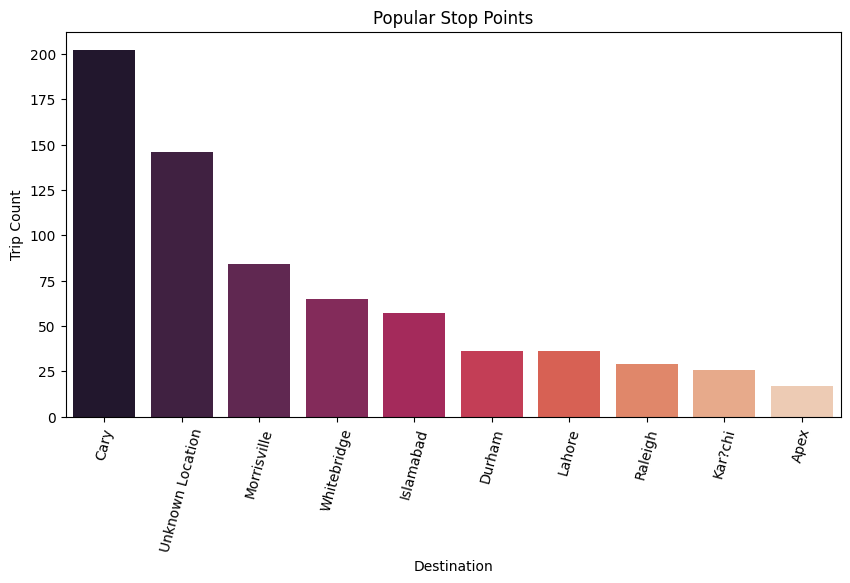

In [16]:
# bar plot for top 10 stop points
stop_labels = df.STOP.value_counts().nlargest(10)

# bar plot
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 75)
sns.barplot(x = stop_labels.index, y = stop_labels, palette = 'rocket')
plt.ylabel('Trip Count')
plt.xlabel('Destination')
plt.title('Popular Stop Points')

In [17]:
# extracting months from column START_DATE
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [18]:
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr', 5.0: 'May', 6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

df["MONTH"] = df.MONTH.map(month_label)

In [19]:
df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', nan], dtype=object)

In [20]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Jan


Text(0.5, 1.0, 'Trips per Month')

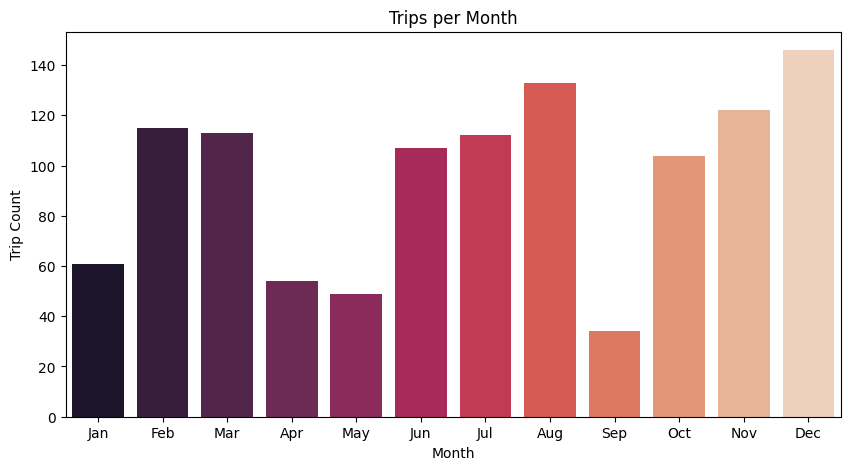

In [21]:
# Compute month counts
month_count = df.MONTH.value_counts()

# define the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize = (10, 5))
sns.barplot(x = month_count.index, y = month_count, order = month_order, palette = 'rocket')
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.title('Trips per Month')


December is the busiest month of the year in terms of trips, while September is the least busy

In [22]:
# creating a dictonary that contains info about miles column
miles_dic = {}

for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
            
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

In [23]:
len_miles = []

for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))

Text(0.5, 1.0, 'Miles Distribution')

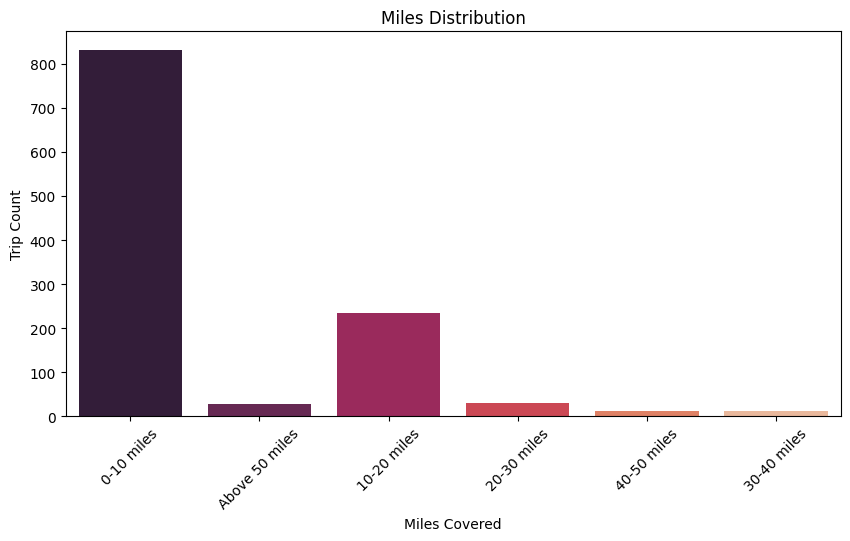

In [24]:
a, b = [], []

for i, j in len_miles:
    a.append(i)
    b.append(j)

plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(x = a, y = b, palette = 'rocket')
plt.xlabel('Miles Covered')
plt.ylabel('Trip Count')
plt.title('Miles Distribution')

In [25]:
# now we want to know how many trips were made on Day time and how many on Night time (6 PM is threshold)
t = pd.to_datetime(['18:00:00']).time

In [26]:
def check_time(tim):
    if t > tim:
        tim = 'DAY RIDE'
    else:
        tim = 'NIGHT RIDE'

df['DAY/NIGHT'] = df.apply(lambda x: 'NIGHT RIDE' if pd.notnull(x['START_DATE']) and x['START_DATE'].time() > t[0] else 'DAY RIDE', axis = 1)

Note: in the above function, night ride condition takes a not-null value greater than t[0] which is the first element of the datetime object 't'

Text(0.5, 0, 'Day/Night')

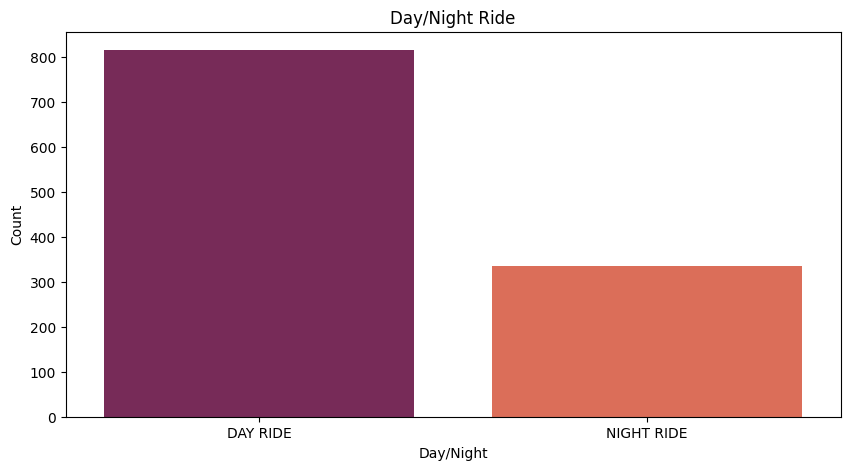

In [27]:
# bar plot for trip times
day_night_label = df['DAY/NIGHT'].value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(x = day_night_label.index, y = day_night_label, palette = 'rocket')
plt.title('Day/Night Ride')
plt.ylabel('Count')
plt.xlabel('Day/Night')

In [28]:
df['DAY'] = df.START_DATE.dt.weekday

In [29]:
day_label = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

df['DAY'] = df['DAY'].map(day_label)

Text(0.5, 1.0, 'Trips Per Day')

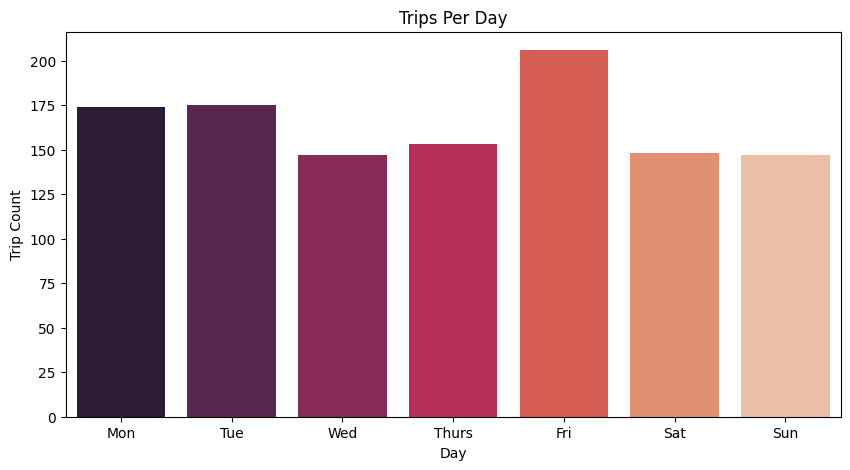

In [30]:
day_label = df.DAY.value_counts()
week_order = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# bar plot of trips per day
plt.figure(figsize = (10, 5))
sns.barplot(x = day_label.index, y = day_label, order = week_order, palette = 'rocket')
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.title('Trips Per Day')

Text(0.5, 1.0, 'Day Wise Trip Category')

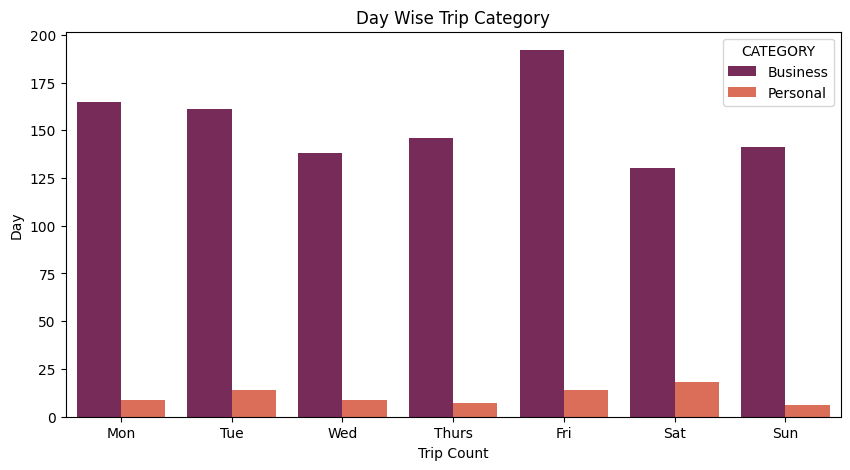

In [31]:
# count plot of daywise trip category
plt.figure(figsize = (10, 5))
sns.countplot(hue = 'CATEGORY', x = 'DAY', data = df, order = week_order, palette = 'rocket')
plt.xlabel('Trip Count')
plt.ylabel('Day')
plt.title('Day Wise Trip Category')

Friday has the highest overall trips and business trips, while Saturday has the most personal trips of the week.

Text(120.72222222222221, 0.5, 'Day of Week')

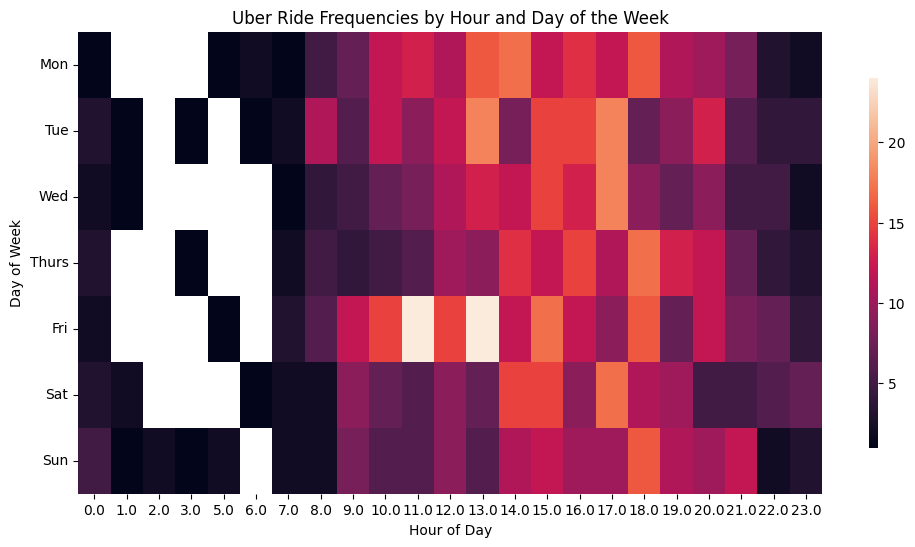

In [32]:
# heatmap for trip frequency by hour and day of the week

# Extract hour and day of the week from the START_DATE column
df['HOUR'] = df['START_DATE'].dt.hour

# Create a pivot table with the count of trips
heatmap_data = df.pivot_table(index = 'DAY', columns = 'HOUR', values = 'MILES', aggfunc = 'count')

# Reorder days for better visualization
ordered_days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot the heatmap
plt.figure(figsize = (12, 6))

sns.heatmap(
    heatmap_data, 
    cmap = "rocket", 
    linewidths = 0,   # Removes the grid effect
    annot = False,    # Removes numbers in cells
    cbar_kws = {"shrink": 0.8, "aspect": 40}  # Customizing the color bar
)

# Apply interpolation for smoother blending
plt.imshow(heatmap_data, cmap = "rocket", aspect = "auto", interpolation = "bicubic")

plt.title("Uber Ride Frequencies by Hour and Day of the Week")
plt.xlabel("Hour of Day")
plt.yticks(rotation = 0)
plt.ylabel("Day of Week")

- Peak hours tend to be between 12 PM and 2 PM, suggesting commuters' lunch breaks, business travels, tourist trips, etc.
- White patches might indicate data inconsistencies or genuinely low demand in these periods.

(0.0, 50.0)

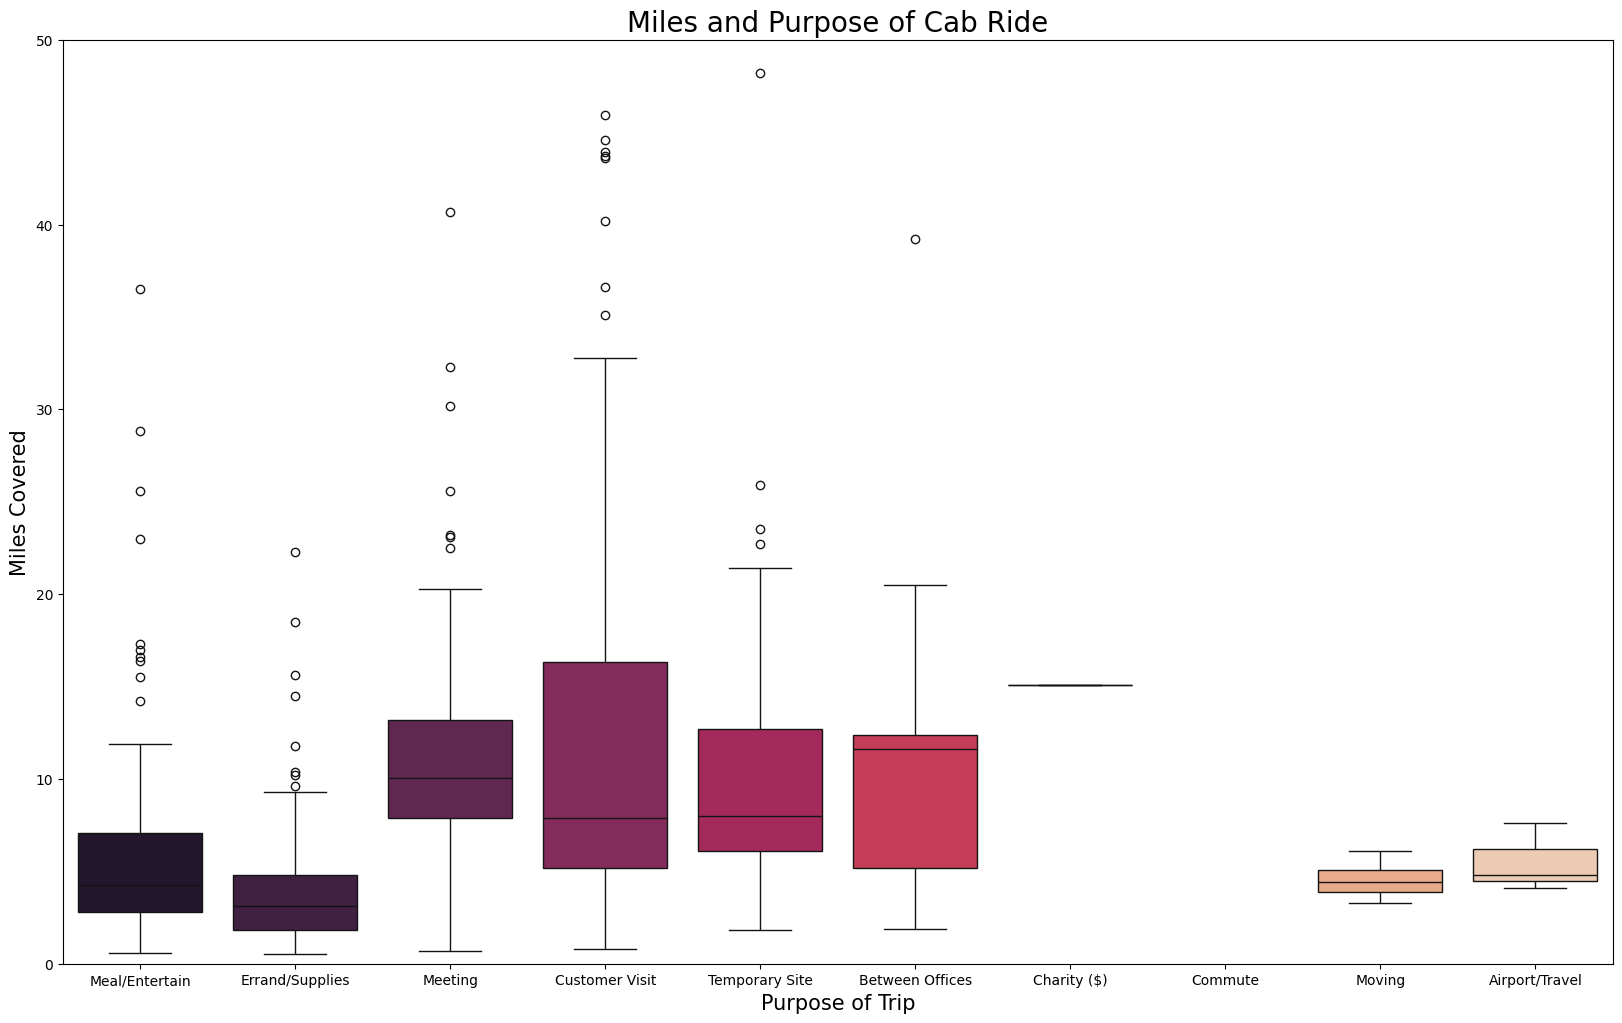

In [33]:
# box plot for miles and purpose of cab ride
plt.figure(figsize = (20, 12))
sns.boxplot(y  = 'MILES', x = 'PURPOSE', palette = 'rocket', data = df)
plt.title('Miles and Purpose of Cab Ride', fontsize = 20)
plt.ylabel('Miles Covered', fontsize = 15)
plt.xlabel('Purpose of Trip', fontsize = 15)
plt.ylim(0, 50)

(0.0, 50.0)

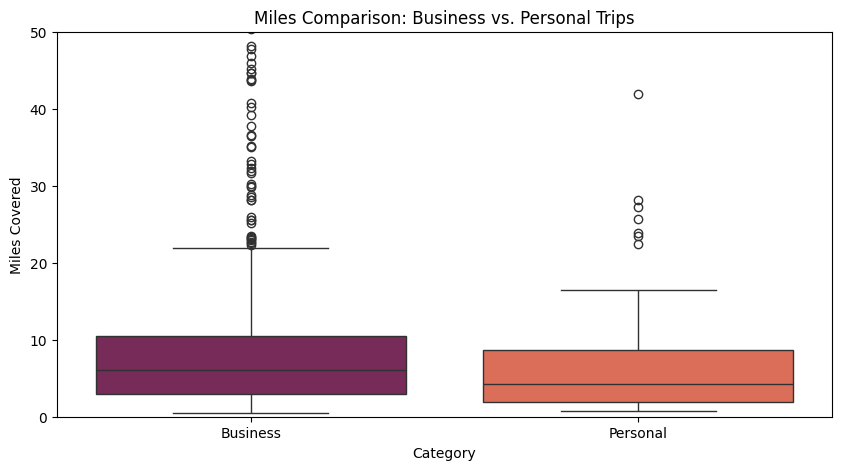

In [34]:
# box plot for miles and category of cab ride
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'CATEGORY', y = 'MILES', data = df, palette = 'rocket')
plt.title("Miles Comparison: Business vs. Personal Trips")
plt.xlabel("Category")
plt.ylabel("Miles Covered")
plt.ylim(0, 50)

In [35]:
# export the excel file for Power BI Report
df.to_excel('Uber Trips 2016.xlsx', index = False)